In [1]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do t

In [2]:
train_data.shape

(25000,)

In [3]:
train_labels.shape

(25000,)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

These reviews have been encoded using some word-integer index.  
Let's attempt to decode one now to understand what our data looks like.

In [6]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the Data
We have to format the list of integers into a tensor. Let's explore one way to do this. 
I am already familiar with one-hot encoding, so we will make a 10,000-dimensional vector where each element in the vector represents one of the 'bag of words.'

Typically we could use pandas, but we will do so manually for now.

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorizing the labels is less complex as we only need to convert to a numpy array and float32

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the Network
The input data is vectors, and the labels are scalars (1s and 0s).  
A type of network that performs well on such a probelm is a simple stack of fully connected `Dense` layers with `relu` activations:  
`Dense(16, activation='relu')`

In this case, we will choose one input layer, one hidden layer, each with 16 neurons, and finally an output layer.  
The first two layers will use `relu` as their activation function, and the final layer will use a sigmoid activation so as to output a probability.

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Now we need to choose a **loss function** and an **optimizer**. 

Because we are facing a binary classification problem and the output of the network is a porbability, it's best to use the `binary_crossentropy` loss.  
You *could* use `mean_squared_error`, but crossentropy is usually the best choice when dealing with models that output probabilities.

As for the optimizer, we will choose `rmsprop`, and we will monitor accuracy during training.

In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### Note about Validation
In order to monitor during training the accuracy of the model on data it has never seen before, we will need to create a validation set by setting apart 10,000 samples from the original training data.

In [14]:
x_val = x_train[:10000] # Set aside first 10,000 samples for validation
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training
We will now train the model for 20 epochs, in mini-batches of 512 samples. At the same time, we'll monitor loss and accuracy on the 10,000 samples that we set apart.

In [15]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5980 - accuracy: 0.7266 - val_loss: 0.4076 - val_accuracy: 0.8637
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3443 - accuracy: 0.8931 - val_loss: 0.3153 - val_accuracy: 0.8920
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2419 - accuracy: 0.9293 - val_loss: 0.2959 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1860 - accuracy: 0.9419 - val_loss: 0.3112 - val_accuracy: 0.8733
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1546 - accuracy: 0.9507 - val_loss: 0.2956 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1229 - accuracy: 0.9647 - val_loss: 0.2852 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0962 - accuracy: 0.9734 - val_loss: 0.3066 - val_accuracy: 0.8850
Epoch 8/20
30

## History Visualization

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

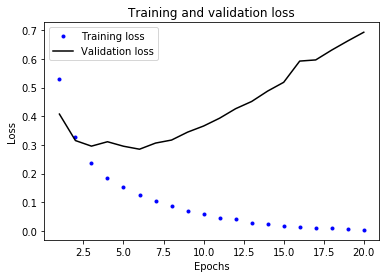

In [17]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b.', label='Training loss')
plt.plot(epochs, val_loss_values, 'k', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

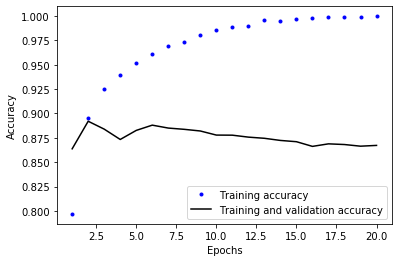

In [18]:
plt.clf() # Clears the figure

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'b.', label='Training accuracy')
plt.plot(epochs, val_acc, 'k', label='Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Overview
We see that after about 4 epochs that the model is overfitting to the training data.  
Let's train a new network from scratch for four epochs and then evaluate it on the test data.

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.5536 - accuracy: 0.7470
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2773 - accuracy: 0.9080
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2038 - accuracy: 0.9301
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3041 - accuracy: 0.8789


In [20]:
results

[0.3041165769100189, 0.8789200186729431]

This naive approach achieves an accuracy of 88%. With state-of-the-art approaches, you should be able to get close to 95%.

## Predictions on new data

In [21]:
model.predict(x_test)

array([[0.15129861],
       [0.9993106 ],
       [0.60875714],
       ...,
       [0.09555832],
       [0.04494792],
       [0.45986423]], dtype=float32)

We see from the results of `predict()` that the network is quite confident for some samples (0.99 or more, or 0.1 or less), but less confident for others (0.57).


## Further Experiments
We made some reasonable architecture choices, but there may yet be some room for improvement. Let's see what occurs when we make the following changes.

- Use **one** or **three** hidden layers, and see how doing so affects validation and test accuracy.
- Using layers with more or less hidden units: 8, 32, 64, so on..
- Using the `mse` loss function instead of `binary_crossentropy`
- Using the `tanh` activation instead of `relu`

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu')) # Third hidden layer
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.5628 - accuracy: 0.7344
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2678 - accuracy: 0.9095
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1909 - accuracy: 0.9344
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3120 - accuracy: 0.8782


In [23]:
results

[0.31200337409973145, 0.8781599998474121]

Accuracy has dropped when adding an extra layer. Let's now remove one from the original network.

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.5407 - accuracy: 0.7579
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2859 - accuracy: 0.9076
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2165 - accuracy: 0.9281
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2817 - accuracy: 0.8879


In [25]:
results

[0.2817399203777313, 0.8879200220108032]

There was approximately a `0.004` increase in accuracy when using only an input and output layer.

#### Hidden Units

In [26]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.6522 - accuracy: 0.6490
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.4680 - accuracy: 0.8747
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.3375 - accuracy: 0.9107
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2956 - accuracy: 0.8903


In [27]:
results

[0.29561421275138855, 0.8903200030326843]

In [28]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.5308 - accuracy: 0.7355
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2504 - accuracy: 0.9108
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1860 - accuracy: 0.9343
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3300 - accuracy: 0.8740


In [29]:
results

[0.3299665153026581, 0.873960018157959]

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.5167 - accuracy: 0.7418
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2285 - accuracy: 0.9158
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1748 - accuracy: 0.9352
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.5043 - accuracy: 0.8282


In [31]:
results

[0.5043279528617859, 0.8282399773597717]

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.5713 - accuracy: 0.7138
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2903 - accuracy: 0.9052
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2117 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2943 - accuracy: 0.8831


In [33]:
results

[0.2942877411842346, 0.883080005645752]

These have all resulted in a small drop in accuracy, with the smallest drop in accuracy resulting from the change in (16,16) units to (8,8).

#### Loss function

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.1837 - accuracy: 0.7549
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.0800 - accuracy: 0.9145
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.0592 - accuracy: 0.9343
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.0986 - accuracy: 0.8666


In [35]:
results

[0.09861186891794205, 0.8666399717330933]

This results in similar performance.

#### Activation Function

In [36]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.1725 - accuracy: 0.7513
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.0713 - accuracy: 0.9144
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.0472 - accuracy: 0.9431
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.0925 - accuracy: 0.8783


In [37]:
results

[0.09254321455955505, 0.8783199787139893]